<a href="https://colab.research.google.com/github/sayinsercan/pyview/blob/master/binomialModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

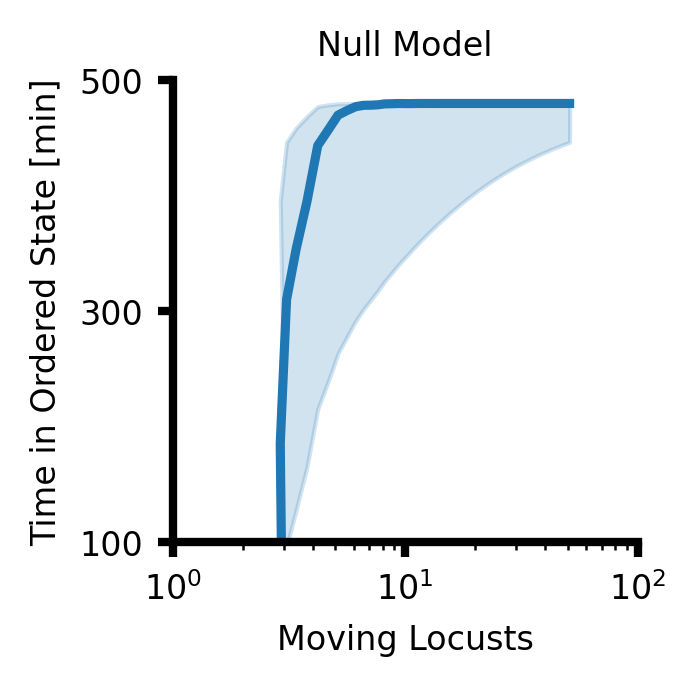

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import statsmodels.stats.proportion as smp

# Parameters
p_moving = 0.51  # Probability of a locust being in the moving state
p_align = 0.84    # Probability that a moving locust is aligned
threshold = 0.3  # Threshold for considering the group as aligned
n_values = np.arange(2, 101)  # Group size ranging from 5 to 100 locusts

# Initialize lists to store results
group_p_ordered_state = []
lower_bounds = []
upper_bounds = []
num_moving = []

for n in n_values:
    # Calculate the probability of 0 or 1 locust moving
    p_0 = binom.pmf(0, n, p_moving)  # Probability that 0 locusts are moving
    p_1 = binom.pmf(1, n, p_moving)  # Probability that 1 locust is moving
    p_less_than_two_moving = p_0 + p_1

    # Calculate the probability of at least two locusts moving
    p_at_least_two_moving = 1 - p_less_than_two_moving

    if p_at_least_two_moving > 0:
        # Calculate the expected number of locusts moving, conditioned on at least two moving
        n_moving_expected = n * p_moving / p_at_least_two_moving
    else:
        n_moving_expected = 0

    num_moving.append(n_moving_expected)

    if n_moving_expected < 2:
        group_p_ordered = 0  # No ordered state if fewer than 2 locusts are moving
    else:
        # Calculate the minimum number of aligned locusts needed to exceed the threshold
        min_aligned_needed = int(np.floor(threshold * n_moving_expected))

        # Calculate the probability that the number of aligned locusts exceeds this threshold
        p_above_threshold = binom.sf(min_aligned_needed, int(n_moving_expected), p_align)

        # Calculate the group-level probability of being in the ordered state
        group_p_ordered = p_at_least_two_moving * p_above_threshold

    # The probability of being in the unordered state includes the scenarios with <2 moving
    p_unordered = p_less_than_two_moving + (1 - group_p_ordered)
    group_p_ordered = 1 - p_unordered
    # Append the probability of being in the ordered state
    group_p_ordered_state.append(group_p_ordered)

    # Calculate the Wilson score interval for the ordered state probability
    lower, upper = smp.proportion_confint(group_p_ordered * n_moving_expected, n_moving_expected, method='wilson', alpha=0.05)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Convert lists to numpy arrays for easier manipulation
group_p_ordered_state = np.array(group_p_ordered_state)
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)
num_moving = np.array(num_moving)

# Plotting
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
plt.rcParams['font.size'] = 8
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['axes.linewidth'] = 2
# Plotting
plt.plot(num_moving, group_p_ordered_state * 480, linestyle='-', color='#1f77b4', label='Group P(Ordered State)',linewidth=2.2)

# Add fill_between for confidence intervals
plt.fill_between(num_moving, lower_bounds * 480, upper_bounds * 480, color='#1f77b4', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Moving Locusts')
plt.ylabel('Time in Ordered State [min]')
plt.xticks(n_values)
plt.xscale("log")
plt.xlim(1, 100)
plt.ylim(100, 500)
plt.yticks([100,300,500])
plt.title("Null Model",fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

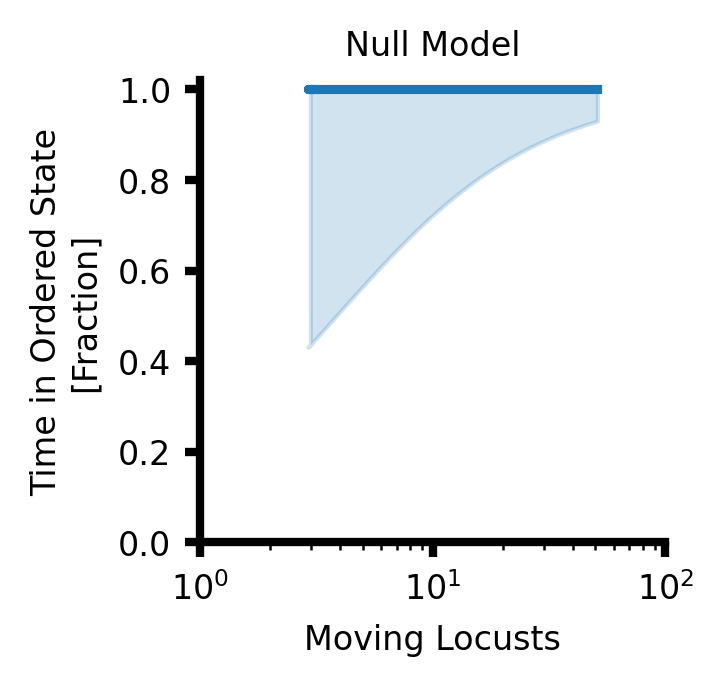

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import statsmodels.stats.proportion as smp

# Parameters
p_moving = 0.51  # Probability of a locust being in the moving state
p_align = 0.84   # Probability that a moving pair is aligned
n_values = np.arange(3, 101)  # Group size ranging from 5 to 100 locusts
threshold = 0.3
# Initialize lists to store results
p_ordered_state = []
lower_bounds = []
upper_bounds = []
num_pairs = []
num_moving = []

for n in n_values:
    # Calculate the probability of at least two locusts moving
    p_0 = binom.pmf(0, n, p_moving)  # Probability that 0 locusts are moving
    p_1 = binom.pmf(1, n, p_moving)  # Probability that 1 locust is moving
    p_at_least_two_moving = 1 - (p_0 + p_1)

    # Calculate the expected number of locusts moving, conditioned on at least two moving
    n_moving_expected = n * p_moving / p_at_least_two_moving
    num_moving.append(n_moving_expected)

    # Calculate the probability of being in the ordered state
    p_ordered = p_at_least_two_moving * p_align > threshold

    # Consider <2 moving as unordered?
    # p_unordered = (1 - p_ordered) + (1 - p_at_least_two_moving)
    # p_ordered = 1 - p_unordered

    p_ordered_state.append(p_ordered)

    # Calculate the Wilson score interval for the ordered state probability
    lower, upper = smp.proportion_confint(p_ordered * n_moving_expected, n_moving_expected, method='wilson', alpha=0.05)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Convert lists to numpy arrays for easier manipulation
p_ordered_state = np.array(p_ordered_state)
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)
num_moving = np.array(num_moving)

# Plotting
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
plt.rcParams['font.size'] = 8
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['axes.linewidth'] = 2
# Plotting
plt.plot(num_moving, p_ordered_state, linestyle='-', color='#1f77b4', label='Group P(Ordered State)',linewidth=2.2)

# Add fill_between for confidence intervals
plt.fill_between(num_moving, lower_bounds, upper_bounds, color='#1f77b4', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Moving Locusts')
plt.ylabel('Time in Ordered State\n[Fraction]')
plt.xticks(n_values)
plt.xscale("log")
plt.xlim(1, 100)
plt.ylim(0, 1.02)
# plt.xticks([1,300,500])
plt.title("Null Model",fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()